# Import

In [2]:
import pandas as pd
import numpy as np
import os,  sys

import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Find path to .py files
sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')

from grouping import Grouping, Resource
import plotter

# Load inputs

In [3]:
# We will do heterogeneity calculations on the drillhole "assay" csv file in this notebook
DH_ROOT = '../data/ptfi_2/dh_and_bm_data/drillholes/'

assay = pd.read_csv(DH_ROOT + 'assay.csv')
collar = pd.read_csv(DH_ROOT + 'collar.csv')

collar = collar.set_index('HOLEID')
collars = list(collar.index)

# Inspect and clean

In [4]:
elements = ['CU', 'AU', 'AG']
idx = assay.index[assay['CU'] < 0.0].to_list()
assay.iloc[idx]

,HOLEID,FROM,TO,INTLEN,SAMPID,CU,AU,AG
1253,M12-12,156.0,159.00,3.00,M12-12_0156_0159,-9.0,0.16,1.6
58779,M7-15,81.0,84.90,3.90,M7-15_0081_0084,-9.0,0.88,1.0
78480,M6-5,219.0,222.00,3.00,M6-5_0219_0222,-9.0,0.11,1.0
82622,M7-6,261.0,262.20,1.20,M7-6_0261_0262,-9.0,0.04,1.0
82623,M7-6,262.2,265.25,3.05,M7-6_0262_0265,-9.0,0.25,1.0
87279,M6-9,288.0,290.00,2.00,M6-9_0288_0290,-9.0,0.57,1.0
120431,M8-11,24.0,27.00,3.00,M8-11_0024_0027,-9.0,0.67,1.0
122315,M12-6B,147.0,150.00,3.00,M12-6B_0147_0150,-9.0,0.27,4.1
122542,M8-12,297.0,300.00,3.00,M8-12_0297_0300,-9.0,0.03,1.0


In [5]:
# Handle default values and replace with np.nan
assay = assay.replace(-9, np.nan)

In [6]:
assay.describe()

,FROM,TO,INTLEN,CU,AU,AG
count,132209.000000,132209.000000,132209.000000,132200.000000,129385.000000,126988.000000
mean,202.491631,204.932582,2.440951,0.954880,0.713305,4.440873
std,195.537457,195.938056,0.875741,1.551783,1.723895,7.514259
min,0.000000,0.450000,0.050000,0.000300,0.005000,0.100000
25%,48.000000,50.000000,1.500000,0.170000,0.120000,0.900000
50%,132.000000,135.000000,3.000000,0.398100,0.340000,2.200000
75%,314.700000,317.600000,3.000000,1.050000,0.720000,5.000000
max,1297.500000,1300.000000,60.250000,56.910000,141.000000,419.000000


In [7]:
unique_hole_ids = list(assay['HOLEID'].unique())

# Create Groupings

In [8]:
drillholes = {}

for hole_id in unique_hole_ids:
    data = assay.query('HOLEID == @hole_id')
    # .sort_values(by=['FROM']).reset_index(drop=True)
    
    drillholes[hole_id] = Grouping(hole_id)
    for element in elements:
        drillholes[hole_id].add_resource(element, data['INTLEN'], data[element])
    
    

No data for grouping: MM10-4-7, resource: AG
No data for grouping: MM10-4-8, resource: AG
No data for grouping: DXT.23-2, resource: AU
No data for grouping: MM10-4-9, resource: AG
No data for grouping: DXT.23-5, resource: AU
No data for grouping: N10-1-1, resource: AG
No data for grouping: N10-1-2, resource: AG
No data for grouping: N10-1-3, resource: AG
No data for grouping: G-51, resource: AU
No data for grouping: G-51, resource: AG
No data for grouping: DXT.19-3, resource: AU
No data for grouping: S6-2, resource: AU
No data for grouping: K9-9-3, resource: AG
No data for grouping: MM10-4-10, resource: AG
No data for grouping: MM10-4-11, resource: AG
No data for grouping: MM10-1-1, resource: AG
No data for grouping: MM10-1-2, resource: AG
No data for grouping: MM10-2-1, resource: AG
No data for grouping: MM9-4-7, resource: AG
No data for grouping: MM10-1-3, resource: AG
No data for grouping: MM10-2-2, resource: AG
No data for grouping: MM10-3-1, resource: AG
No data for grouping: MM10

In [9]:
m12_12 = drillholes['M12-12']
m12_12.resources['AU'].info.head()

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,3.0,2.07,3.0,0.01771,0.017710,6.21,6.21,2.0700,0.074345,0.074345,0.003208
1,3.0,1.68,6.0,0.01771,0.035419,5.04,11.25,1.8750,0.060338,0.134682,0.001817
2,3.0,1.68,9.0,0.01771,0.053129,5.04,16.29,1.8100,0.060338,0.195020,0.001817
3,3.0,1.64,12.0,0.01771,0.070838,4.92,21.21,1.7675,0.058901,0.253921,0.001697
4,3.0,1.50,15.0,0.01771,0.088548,4.50,25.71,1.7140,0.053873,0.307794,0.001308


In [10]:
m12_12.resources['AU'].heterogeneity

0.9509050558336213

# Output

Save each element in each drillhole grouping as a seperate G-R graph when possible

In [11]:
# output_dir = "../outputs/het_analysis_assay/"

# fig = plt.figure()
# fig.set_size_inches(8, 8)

# # dhid = "M12-12"
# # drillhole = drillholes[dhid]

# for dhid, drillhole in drillholes.items():
#     # print(dhid)
#     save_loc = output_dir + f'{dhid}/'
#     if not os.path.exists(save_loc):
#         os.makedirs(save_loc)

#     for element in elements:
#         if element in drillhole.resources:
#             fig.clear()
#             ax = fig.add_subplot()

#             het = drillhole.resources[element].heterogeneity
#             df = drillhole.resources[element].info
            
#             if len(df) > 0:
#                 ax.set_title(f'{dhid}_{element}_HET={het:.2f}')
#                 plotter.plot_grade_recovery_curve(ax, df, element)

#                 fig.savefig(save_loc + f'{dhid}_{element}.svg', format='svg')

# Inspect

In [12]:
drillholes["J9-4-4"].resources['AG'].info

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,1.0,28.0,1.0,0.008929,0.008929,28.0,28.0,28.000000,0.051020,0.051020,0.001772
1,1.0,23.9,2.0,0.008929,0.017857,23.9,51.9,25.950000,0.043550,0.094570,0.001199
2,1.0,16.0,3.0,0.008929,0.026786,16.0,67.9,22.633333,0.029155,0.123724,0.000409
3,1.0,14.3,4.0,0.008929,0.035714,14.3,82.2,20.550000,0.026057,0.149781,0.000293
4,1.0,14.1,5.0,0.008929,0.044643,14.1,96.3,19.260000,0.025692,0.175474,0.000281
...,...,...,...,...,...,...,...,...,...,...,...
107,1.0,1.2,108.0,0.008929,0.964286,1.2,546.8,5.062963,0.002187,0.996356,0.000045
108,1.0,0.5,109.0,0.008929,0.973214,0.5,547.3,5.021101,0.000911,0.997267,0.000064
109,1.0,0.5,110.0,0.008929,0.982143,0.5,547.8,4.980000,0.000911,0.998178,0.000064
110,1.0,0.5,111.0,0.008929,0.991071,0.5,548.3,4.939640,0.000911,0.999089,0.000064


In [13]:
hets = {}
for element in elements:
    hets[element] = []

for dhid, drillhole in drillholes.items():
    for element in elements:
        if element in drillhole.resources:
            dhr = drillhole.resources[element]
            hets[element].append(dhr.heterogeneity)
        else:
            hets[element].append(np.nan)

In [14]:
# pd.set_option('display.float_format', lambda x: '%.5f' % x)
hets_data = pd.DataFrame(hets)
hets_desc = hets_data.describe([0.1, 0.25, 0.5, 0.75, 0.9])

array([[<AxesSubplot:title={'center':'CU'}>,
        <AxesSubplot:title={'center':'AU'}>],
       [<AxesSubplot:title={'center':'AG'}>, <AxesSubplot:>]],
      dtype=object)

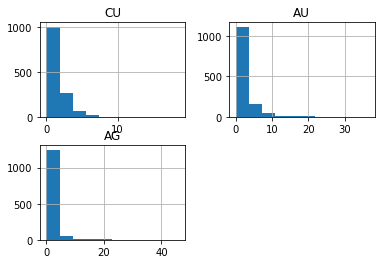

In [15]:
hets_data.hist()

# Output

Output master G-R graphs

In [16]:
# import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick

# # then we want to graph the mass yield curves for all the individual elements
# output_dir = "../outputs/het_analysis_assay/"

# fig = plt.figure()
# fig.set_size_inches(12, 12)

# s = 0.5
# alpha = 0.1

# for element in elements:
#     fig.clear()
#     ax = fig.add_subplot()
    
#     ax_sec = ax.twinx()

#     ax.set_xlabel("Cumulative Mass %")
#     ax.set_xlim(0, 1)
#     ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
#     ax.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
#     ax.set_ylabel(f"Cumulative {element} Grade", c="blue")
    
#     ax_sec.set_ylabel(f"Cumulative {element} Recovery", c="red") 
#     ax_sec.set_ylim(0, 1)
#     ax_sec.set_yticks([0, 0.25, 0.5, 0.75, 1])
#     ax_sec.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

#     for dhid, drillhole in drillholes.items():
#         if element in drillhole.resources:
#             df = drillhole.resources[element].info
#             x = df['cml_weight_pct']
#             y = df['cml_grade']
#             ax.scatter(x, y, color='blue', alpha=alpha, s=s)
            
#             y = df['cml_recovery']
#             ax_sec.scatter(x, y, color='red', alpha=alpha, s=s)
            
#     ax.set_ylim([0, None])
#     ax.set_title(f'master_{element}')

#     save_loc = output_dir + f'master/'
#     if not os.path.exists(save_loc):
#         os.makedirs(save_loc)
#     fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

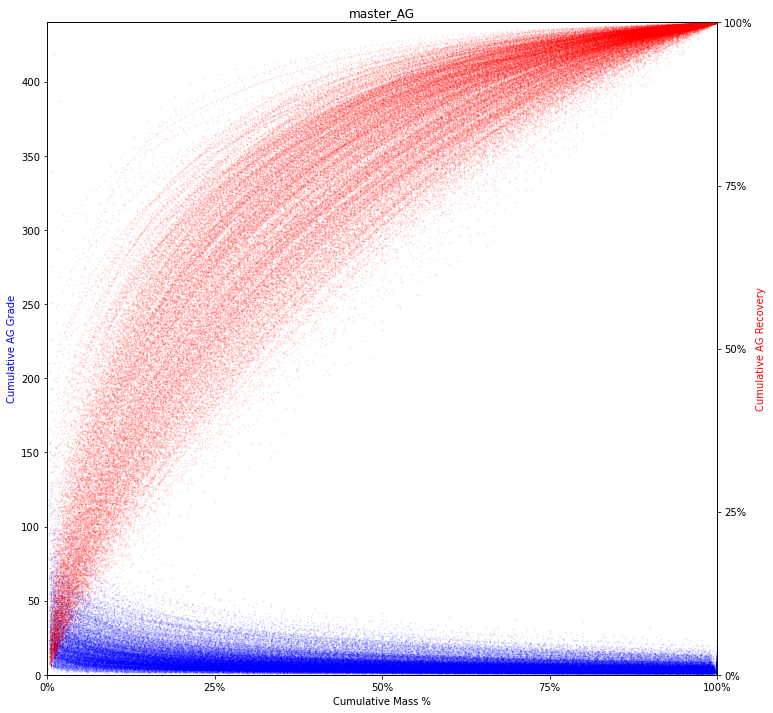

In [17]:
# then we want to graph the mass yield curves for all the individual elements
output_dir = "../outputs/het_analysis_assay/"

fig = plt.figure()
fig.set_size_inches(12, 12)

s = 0.5
alpha = 0.1

for element in elements:
    fig.clear()
    ax = fig.add_subplot()
    ax_sec = ax.twinx()

    for dhid, drillhole in drillholes.items():
        if element in drillhole.resources:
            plotter.plot_g_r(ax, ax_sec, drillhole.resources[element].info, s=s, alpha=alpha)
            
    plotter.set_g_r_labels(ax, ax_sec, element)
    ax.set_title(f'master_{element}')

    save_loc = output_dir + f'master/'
    if not os.path.exists(save_loc):
        os.makedirs(save_loc)
    fig.savefig(save_loc + f'master_{element}.png', format='png', dpi=200)

In [18]:
drillholes['DZ30-01SM-04'].resources['CU'].info

,weight,grade,cml_weight,weight_pct,cml_weight_pct,yield,cml_yield,cml_grade,recovery,cml_recovery,int_het
0,3.0,9.2500,3.0,0.012653,0.012653,27.75000,27.75000,9.250000,0.110551,0.110551,0.009584
1,3.0,7.5500,6.0,0.012653,0.025306,22.65000,50.40000,8.400000,0.090234,0.200785,0.006019
2,3.0,3.1300,9.0,0.012653,0.037959,9.39000,59.79000,6.643333,0.037408,0.238193,0.000613
3,3.0,2.8300,12.0,0.012653,0.050612,8.49000,68.28000,5.690000,0.033823,0.272016,0.000448
4,3.0,2.6400,15.0,0.012653,0.063264,7.92000,76.20000,5.080000,0.031552,0.303568,0.000357
...,...,...,...,...,...,...,...,...,...,...,...
74,3.0,0.1722,225.9,0.012653,0.952763,0.51660,249.58579,1.104851,0.002058,0.994307,0.000112
75,2.6,0.1638,228.5,0.010966,0.963728,0.42588,250.01167,1.094143,0.001697,0.996004,0.000086
76,3.0,0.1514,231.5,0.012653,0.976381,0.45420,250.46587,1.081926,0.001809,0.997813,0.000118
77,3.1,0.1269,234.6,0.013075,0.989456,0.39339,250.85926,1.069306,0.001567,0.999381,0.000132


In [19]:
combined_data = Grouping('combined_data')

for element in elements:
    combined_data.add_resource(element, assay['INTLEN'], assay[element])

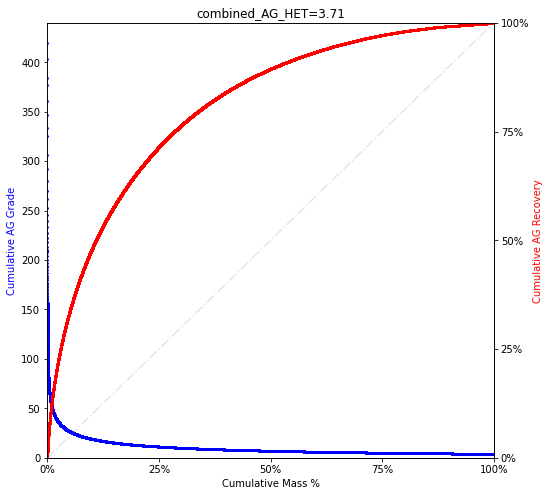

In [20]:
output_dir = "../outputs/het_analysis_assay/"

fig = plt.figure()
fig.set_size_inches(8, 8)

for element in elements:
    fig.clear()
    ax = fig.add_subplot()

    het = combined_data.resources[element].heterogeneity
    df = combined_data.resources[element].info
        
    if len(df) > 0:
        ax.set_title(f'combined_{element}_HET={het:.2f}')
        plotter.plot_grade_recovery_curve(ax, df, element)

        save_loc = output_dir + f'combined/'
        if not os.path.exists(save_loc):
            os.makedirs(save_loc)
        fig.savefig(save_loc + f'combined_{element}.png', format='png', dpi=200)

In [21]:
class GroupingAndLoc:
    def __init__(
        self,
        grouping: Grouping, 
        x: float, 
        y: float, 
        z: float
    ):
        """_summary_

        Args:
            grouping (Grouping): _description_
            x (float): _description_
            y (float): _description_
            z (float): _description_
        """
        self.grouping = grouping,
        self.x = x,
        self.y = y,
        self.z = z
        

In [22]:
drillholes_w_loc = {}
for dhid, drillhole in drillholes.items():
    if dhid not in collars:
        print(f'{dhid} not in collars')
    else:
        c = collar.loc[dhid]
        drillholes_w_loc[dhid] = GroupingAndLoc(drillhole, c.EAST, c.NORTH, c.ELEV)

In [23]:
from mpl_toolkits import mplot3d

%matplotlib qt

In [24]:
xs, ys, zs, hs = [], [], [], {}

for dhid, drillhole in drillholes.items():
    if dhid not in collars:
        print(f'{dhid} not in collars')
    else:
        c = collar.loc[dhid]
        xs.append(c.EAST)
        ys.append(c.NORTH)
        zs.append(c.ELEV)
        for element in elements:
            if element not in hs:
                hs[element] = []
            if element in drillhole.resources:
                dhr = drillhole.resources[element]
                hs[element].append(drillhole.resources[element].heterogeneity)
            else:
                hs[element].append(np.nan)
                


In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'CU'

h = np.array(hs[element])
ax.scatter3D(
    xs, 
    ys, 
    zs, 
    norm=colors.LogNorm(
        vmin=hets_desc[element]['10%'], 
        vmax=hets_desc[element]['90%']
        ),
    c=h, 
    cmap='copper'
    )
ax.set_title(element)
ax.set_xlabel('EAST')
ax.set_ylabel('NORTH')
ax.set_zlabel('ELEV')

Text(0.5, 0, 'ELEV')

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'AU'

h = np.array(hs[element])
ax.scatter3D(
    xs, 
    ys, 
    zs, 
    norm=colors.LogNorm(
        vmin=hets_desc[element]['10%'], 
        vmax=hets_desc[element]['90%']
        ),
    c=h, 
    cmap='copper'
    )
ax.set_title(element)
ax.set_xlabel('EAST')
ax.set_ylabel('NORTH')
ax.set_zlabel('ELEV')

Text(0.5, 0, 'ELEV')

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')

element = 'AG'

h = np.array(hs[element])
ax.scatter3D(
    xs, 
    ys, 
    zs, 
    norm=colors.LogNorm(
        vmin=hets_desc[element]['10%'], 
        vmax=hets_desc[element]['90%']
        ),
    c=h, 
    cmap='copper'
    )
ax.set_title(element)
ax.set_xlabel('EAST')
ax.set_ylabel('NORTH')
ax.set_zlabel('ELEV')

Text(0.5, 0, 'ELEV')